Importar librerias necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import warnings
warnings.filterwarnings('ignore')

### 1. Cargar el conjunto de datos Wine

In [2]:
np.random.seed(42)  # Establecer semilla global de numpy

wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

In [3]:
## ver algo de informacion delos datos

# Ver las primeras 5 filas del dataset completo
print("Primeras 5 filas del dataset:")
print(X.head())

# Ver las dimensiones del dataset
print("\nDimensiones del dataset (filas, columnas):")
print(X.shape)

# Ver la distribución de clases
print("\nDistribución de clases:")
print(pd.Series(y).value_counts())

Primeras 5 filas del dataset:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines 

### 2. Generar partición estratificada 70-30

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

### 3. Genere una gráfica de barras en Pandas que verifique que las particiones de entrenamiento y prueba tengan la misma distribución de clases.

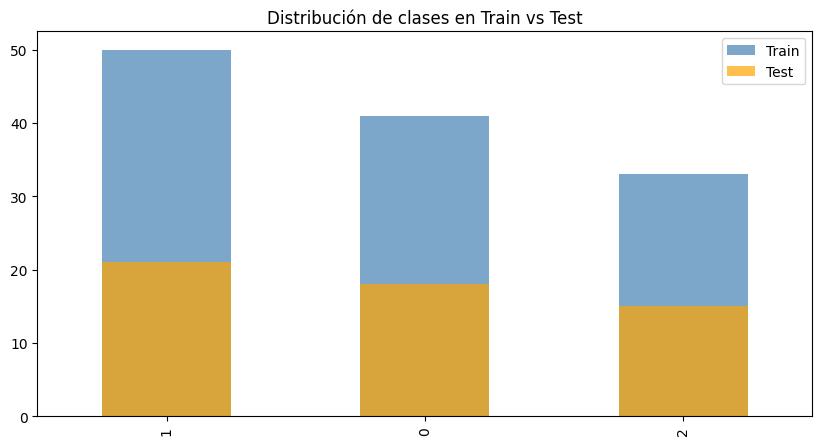

In [5]:
def plot_class_distribution():
    plt.figure(figsize=(10,5))
    pd.Series(y_train).value_counts().plot(kind='bar', alpha=0.7, label='Train', color='steelblue')
    pd.Series(y_test).value_counts().plot(kind='bar', alpha=0.7, label='Test', color='orange')
    plt.title('Distribución de clases en Train vs Test')
    plt.legend()
    plt.show()

plot_class_distribution()

### 4. Entrene un modelo KNearestNeighbor. Use los siguientes valores para evaluar la complejidad: 
1. [1,2,3,... 20]
2. Grafique los errores de entrenamiento y generalización conforme a la complejidad el modelo aumenta.

In [6]:
## evaluar diferentes valores de k
k_values = list(range(1,21))
train_error = []
test_error = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_error.append(1 - knn.score(X_train, y_train))
    test_error.append(1 - knn.score(X_test, y_test))

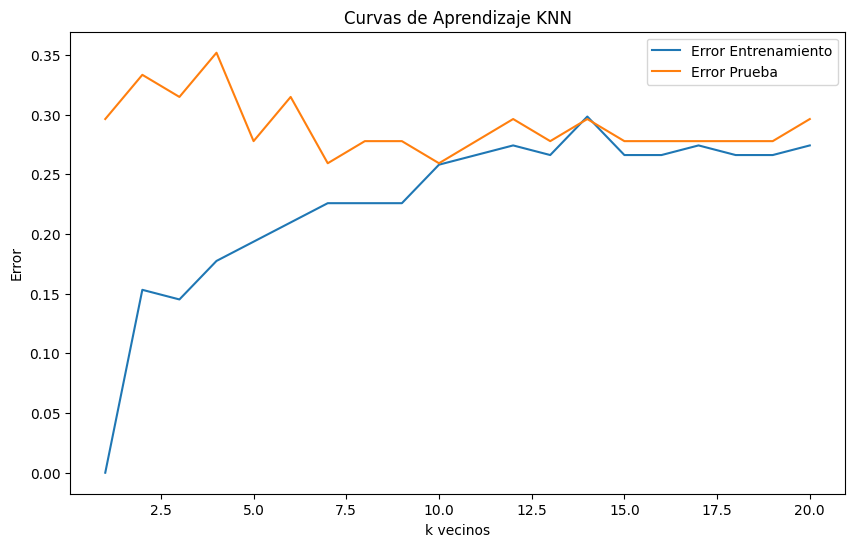

In [7]:
## graficar errores
plt.figure(figsize=(10,6))
plt.plot(k_values, train_error, label='Error Entrenamiento')
plt.plot(k_values, test_error, label='Error Prueba')
plt.xlabel('k vecinos')
plt.ylabel('Error')
plt.legend()
plt.title('Curvas de Aprendizaje KNN')
plt.show()

Aproximadamente en k = 7 y K = 10 el error de prueba es el minimo,  yo usaria alguno de esos dos valores como el optimo.

### 5. Construya un conjunto de datos usando las características Proline contra Flavonoids.
* Use la partición 70-30 definida al inicio
* Usando KNearestNeighbor, determine el número subóptimo de k-vecinos usando evaluación de la complejidad. Use los mismos valores de: [1,2,3,... 20]
* Grafique la superficie de decisión contra los ejemplos de test.
* Reporte accuracy, el error de clasificación, la precisión macro, el recall macro y el F1 score macro sobre el conjunto de prueba.


In [8]:
# Seleccionar características Proline y Flavonoids
X_reduced = X[['proline', 'flavanoids']]

In [9]:
# Usar la misma partición 70-30
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.3, stratify=y, random_state=42
)

In [10]:
# Evaluar diferentes valores de k
k_values = list(range(1,21))
train_error_reduced = []
test_error_reduced = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_reduced, y_train)
    train_error_reduced.append(1 - knn.score(X_train_reduced, y_train))
    test_error_reduced.append(1 - knn.score(X_test_reduced, y_test))

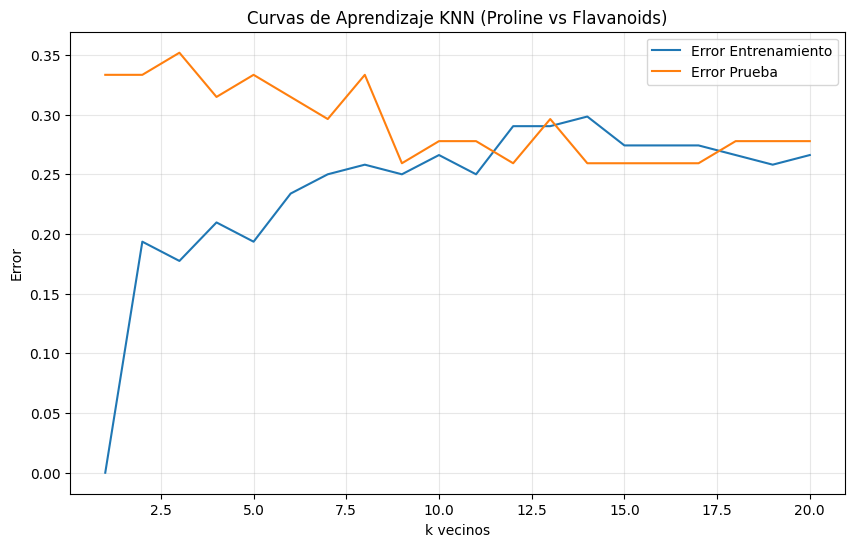

In [11]:
# Graficar curvas de error
plt.figure(figsize=(10,6))
plt.plot(k_values, train_error_reduced, label='Error Entrenamiento')
plt.plot(k_values, test_error_reduced, label='Error Prueba')
plt.xlabel('k vecinos')
plt.ylabel('Error')
plt.legend()
plt.title('Curvas de Aprendizaje KNN (Proline vs Flavanoids)')
plt.grid(True, alpha=0.3)
plt.show()


In [12]:
# Encontrar k óptimo
k_optimo = k_values[np.argmin(test_error_reduced)]
print(f"K óptimo: {k_optimo}")

K óptimo: 9


In [13]:
# Entrenar modelo final con k óptimo
knn_final = KNeighborsClassifier(n_neighbors=k_optimo)
knn_final.fit(X_train_reduced, y_train)

# Graficar superficie de decisión
def plot_decision_boundary(X, y, model, title):
    h = 0.02  # tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10,6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.xlabel('Proline')
    plt.ylabel('Flavanoids')
    plt.title(title)
    plt.colorbar()
    plt.show()

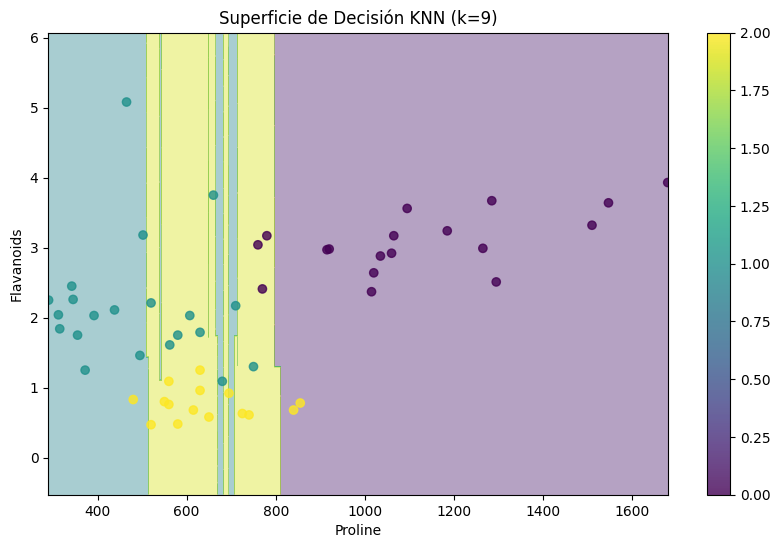

In [14]:

# Visualizar superficie de decisión con datos de prueba
plot_decision_boundary(X_test_reduced.values, y_test, knn_final, 
                      f'Superficie de Decisión KNN (k={k_optimo})')

In [15]:
# Calcular métricas
y_pred = knn_final.predict(X_test_reduced)
accuracy = accuracy_score(y_test, y_pred)
error = 1 - accuracy
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
    y_test, y_pred, average='macro'
)

print("\nMétricas sobre conjunto de prueba:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Error de clasificación: {error:.4f}")
print(f"Precisión macro: {precision_macro:.4f}")
print(f"Recall macro: {recall_macro:.4f}")
print(f"F1 score macro: {f1_macro:.4f}")


Métricas sobre conjunto de prueba:
Accuracy: 0.7407
Error de clasificación: 0.2593
Precisión macro: 0.7604
Recall macro: 0.7444
F1 score macro: 0.7417
